In [132]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [201]:
df1 = pd.read_excel('/Users/Stephanie_Zhang/Desktop/公益-权数综合/微博统计数据.xlsx',error_bad_lines=False)
df2 = pd.read_excel('/Users/Stephanie_Zhang/Desktop/公益-权数综合/基金会共现次数.xlsx',error_bad_lines=False)
df3 = pd.read_excel('/Users/Stephanie_Zhang/Desktop/公益-权数综合/基金会统计数据.xlsx',error_bad_lines=False)

In [53]:
df1.head(4)

,基金会名称,用户名,用户ID,评论数,粉丝数,关注数,转发数,点赞数,原创微博数,微博数
0,爱佑慈善基金会,爱佑慈善基金会,1886130502,99624,317185,1365,337369,5063,1469,5951
1,北京交通大学教育基金会,北京交通大学教育基金会,2755611584,53,374,51,64,66,343,650
2,华润慈善基金会,华润慈善基金会,3917867986,33,68,20,36,4,55,57
3,桃源居公益事业发展基金会,桃源居公益事业发展基金会,3515106867,0,3,0,0,0,0,0


# 第一项：微博分数和排名

# 先算一个Log分

低于10条的算log10 = 2.3分算。

In [285]:
df1['评论数Log分'] = df1['评论数'].apply(lambda x: 2.3 if x <= 10 else math.log(x))
df1['粉丝数Log分'] = df1['粉丝数'].apply(lambda x: 2.3 if x <= 10 else math.log(x))
df1['关注数Log分'] = df1['关注数'].apply(lambda x: 2.3 if x <= 10 else math.log(x))
df1['转发数Log分'] = df1['转发数'].apply(lambda x: 2.3 if x <= 10 else math.log(x))
df1['点赞数Log分'] = df1['点赞数'].apply(lambda x: 2.3 if x <= 10 else math.log(x))
df1['原创微博数Log分'] = df1['原创微博数'].apply(lambda x: 2.3 if x <= 10 else math.log(x))
df1['总分的Log分'] = df1[['评论数Log分' ,'粉丝数Log分', '关注数Log分','转发数Log分','点赞数Log分','原创微博数Log分']].apply(lambda x: x[0]*0.2 + x[1]*0.2 + x[2]*0.1 + x[3]*0.1 + x[4]*0.1 + x[5]*0.2, axis=1)

In [118]:
df1['总分的Log分'].describe()

count    192.000000
mean       5.017438
std        1.842373
min        2.070000
25%        3.371816
50%        5.065355
75%        6.456770
max        9.141503
Name: 总分的Log分, dtype: float64

In [120]:
df1['评论数Log分'].describe()

count    192.000000
mean       5.099716
std        2.364443
min        2.300000
25%        2.620530
50%        4.840234
75%        6.828007
max       11.509158
Name: 评论数Log分, dtype: float64

In [121]:
df1['粉丝数Log分'].describe()


count    192.000000
mean       7.031524
std        2.608647
min        2.300000
25%        4.927254
50%        7.040958
75%        9.065823
max       13.242989
Name: 粉丝数Log分, dtype: float64

In [122]:
df1['关注数Log分'].describe()

count    192.000000
mean       5.090976
std        1.330202
min        2.300000
25%        4.241248
50%        5.173317
75%        5.992693
max        7.940228
Name: 关注数Log分, dtype: float64

In [123]:
df1['转发数Log分'].describe()

count    192.000000
mean       5.991277
std        2.899854
min        2.300000
25%        3.457799
50%        6.020917
75%        8.243639
max       14.298243
Name: 转发数Log分, dtype: float64

In [124]:
df1['点赞数Log分'].describe()

count    192.000000
mean       4.761060
std        2.534416
min        2.300000
25%        2.300000
50%        4.158395
75%        6.470737
max       12.190771
Name: 点赞数Log分, dtype: float64

In [125]:
df1['原创微博数Log分'].describe()

count    192.000000
mean       5.034292
std        1.697695
min        2.300000
25%        3.488815
50%        5.349483
75%        6.586860
max        7.595387
Name: 原创微博数Log分, dtype: float64

# 分数分布图

In [165]:
# 看原始数据的分布
# Fig, ax = plt.subplots(3,2,figsize=[12,12])
# pic2 = df1['评论数'].plot.hist(bins = 40, ax = ax[0][1])
# pic3 = df1['粉丝数'].plot.hist(bins = 40, ax = ax[1][0])
# pic4 = df1['关注数'].plot.hist(bins = 40, ax = ax[1][1])
# pic5 = df1['转发数'].plot.hist(bins = 40, ax = ax[2][0])
# pic6 = df1['点赞数'].plot.hist(bins = 40, ax = ax[2][1])
# plt.show()

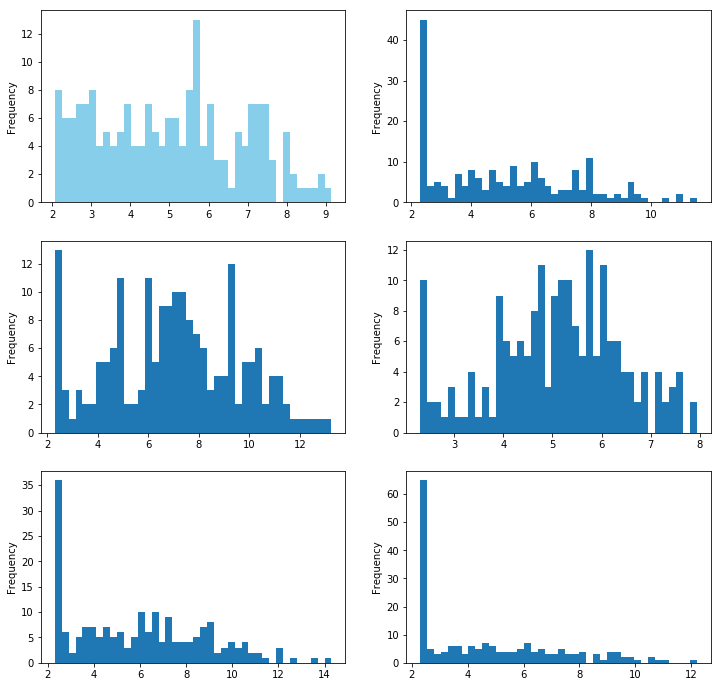

In [158]:
# 看微博各指标的分数分布图，其中浅蓝色的图为算出的微博总分的分布图（以此为主），其他的是微博内细小的指标的分布
# （但这是180个基金会的分布，剩下的没有微博主页的暂时算成1分，并语言说明后续工作是把微博的新闻提及（没有个人主页的也算上）
Fig, ax = plt.subplots(3,2,figsize=[12,12])
# bin_size = 0.1
pic1 = df1['总分的Log分'].plot.hist(bins = 40, ax = ax[0][0], color = "skyblue")
pic2 = df1['评论数Log分'].plot.hist(bins = 40, ax = ax[0][1])
pic3 = df1['粉丝数Log分'].plot.hist(bins = 40, ax = ax[1][0])
pic4 = df1['关注数Log分'].plot.hist(bins = 40, ax = ax[1][1])
pic5 = df1['转发数Log分'].plot.hist(bins = 40, ax = ax[2][0])
pic6 = df1['点赞数Log分'].plot.hist(bins = 40, ax = ax[2][1])
plt.show()

# 微博排名先后顺序

In [284]:
df1

,基金会名称,用户名,用户ID,评论数,粉丝数,关注数,转发数,点赞数,原创微博数,微博数
0,爱佑慈善基金会,爱佑慈善基金会,1886130502,99624,317185,1365,337369,5063,1469,5951
1,北京交通大学教育基金会,北京交通大学教育基金会,2755611584,53,374,51,64,66,343,650
2,华润慈善基金会,华润慈善基金会,3917867986,33,68,20,36,4,55,57
3,桃源居公益事业发展基金会,桃源居公益事业发展基金会,3515106867,0,3,0,0,0,0,0
4,王振滔慈善基金会,王振滔慈善基金会,2174974760,2164,51102,182,8412,1072,899,2161
5,香江社会救助基金会,香江社会救助基金会,1919675101,1192,2306,514,4610,73,376,831
6,友成企业家扶贫基金会,友成基金会,1730345205,446,27135,2001,1242,1042,1330,7273
7,中国癌症基金会,威廉姆斯血液学手册,1795912273,430,6513,771,981,19,292,688
8,中国红十字基金会,中国红十字基金会,1378417172,36041,72000,962,104704,68691,1226,6046
9,中华国际科学交流基金会,科基会,2056231602,1,1068,35,2,2,7,12


In [286]:
result = df1.sort_values(['总分的Log分'], ascending = [0])
result_Show = result[['基金会名称',  '总分的Log分']]
# Y = train_data_labeled['country_destination']


In [287]:
result_Show

,基金会名称,总分的Log分
0,爱佑慈善基金会,9.141503
134,北京爱它动物保护公益基金会,8.925609
81,中国儿童少年基金会,8.860495
8,中国红十字基金会,8.714197
12,中国扶贫基金会,8.602128
58,安利公益基金会,8.291868
130,阿拉善生态基金会,8.188270
93,北京新阳光慈善基金会,8.186282
90,中华少年儿童慈善救助基金会,7.988172
91,中华社会救助基金会,7.970564


# 第三项：谷歌搜索排名：

In [272]:
df3['谷歌搜索Log分'] = df3['谷歌搜索数'].apply(lambda x: 2.3 if x <= 10 else math.log(x))

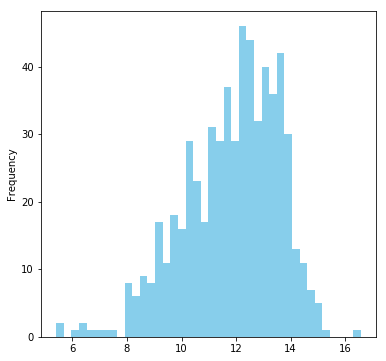

In [273]:
Fig, ax = plt.subplots(1,1,figsize=[6,6])
# bin_size = 0.1
pic1 = df3['谷歌搜索Log分'].plot.hist(bins = 40, color = "skyblue")
plt.show()

如何缩小到10以内的分数？

# 第二项：新闻媒体排名

In [311]:
related_times = df2[['总和']]
df2['新闻关联Log分'] = df2['总和'].apply(lambda x: 1 if x == 0 else 1.09 if x <= 3 else math.log(x))
relatedscore = df2[['基金会名称','总和','新闻关联Log分']]

In [312]:
relatedscore['新闻关联Log分'].describe()

count    605.000000
mean       3.247774
std        2.400188
min        1.000000
25%        1.000000
50%        2.484907
75%        5.620401
max        8.019284
Name: 新闻关联Log分, dtype: float64

In [245]:
# Fig, ax = plt.subplots(1,2,figsize=[12,6])
# pic2_1 = relatedscore['新闻关联Log分'].plot.hist(bins = 80, ax = ax[0], color = "skyblue")
# pic2_2 = relatedscore['总和'].plot.hist(bins = 80, ax = ax[1])
# plt.show()

In [313]:
result2 = relatedscore.sort_values(['新闻关联Log分'], ascending = [0])
result2

,基金会名称,总和,新闻关联Log分
39,中国扶贫基金会,3039.0,8.019284
67,中国青少年发展基金会,2998.0,8.005701
38,中国儿童少年基金会,2856.0,7.957177
9,南都公益基金会,2725.0,7.910224
40,中国妇女发展基金会,2409.0,7.786967
196,腾讯公益慈善基金会,2349.0,7.761745
19,中国红十字基金会,2315.0,7.747165
82,中华思源工程扶贫基金会,2306.0,7.743270
56,中国教育发展基金会,2189.0,7.691200
2,北京交通大学教育基金会,2130.0,7.663877


In [250]:
df3['新闻数'].describe()

count     605.000000
mean       58.469421
std       217.199997
min         0.000000
25%         1.000000
50%         5.000000
75%        29.000000
max      3223.000000
Name: 新闻数, dtype: float64

In [265]:
df3['新闻数log分'] = df3['新闻数'].apply(lambda x: 1 if x == 0 else 1.09 if x <= 3 else math.log(x))

In [266]:
df3['新闻数log分'].describe()

count    605.000000
mean       2.344885
std        1.592300
min        1.000000
25%        1.090000
50%        1.609438
75%        3.367296
max        8.078068
Name: 新闻数log分, dtype: float64

In [274]:
df3

,基金会名称,地址,纬度,经度,基金会成立天数,总员工数,谷歌搜索数,新闻数,项目数,专项基金数,总志愿者数,原始资本,项目总收入,项目总支出,总受捐赠金额,总资助金额,领域,新闻数log分,谷歌搜索Log分
0,爱佑慈善基金会,北京市朝阳区,39.928953,116.447908,3373,39.0,328000,326,17,0.0,221.0,20000000.0,17841000,13151000,3.147266e+08,NaN,儿童，医疗救助,5.786897,12.700769
1,北京大学教育基金会,北京市海淀区,40.002921,116.316913,8063,30.0,1470000,145,18,0.0,19.0,20000000.0,7754000,69709528,1.205500e+09,4.954793e+07,教育，科学研究,4.976734,14.200773
2,北京交通大学教育基金会,北京市海淀区,39.956438,116.343808,2924,10.0,1410000,149,29,0.0,33.0,20000000.0,65266617,124170192,4.194000e+07,0.000000e+00,教育，科学研究,5.003946,14.159100
3,传媒大学教育基金会,北京市朝阳区,39.918224,116.544931,3693,7.0,944000,22,74,0.0,30.0,20000000.0,20810461,17364138,5.326152e+07,5.500000e+06,国际事务，教育，科学研究,3.091042,13.757881
4,海仓慈善基金会,北京市东城区,39.938745,116.439148,3147,NaN,749000,26,2,NaN,NaN,50000000.0,0,4024000,4.100000e+06,0.000000e+00,安全救灾，扶贫助困，教育,3.258097,13.526494
5,华民慈善基金会,北京市东城区,39.918262,116.431709,3429,15.0,671000,301,8,0.0,25.0,50000000.0,3400000,50208621,2.994549e+06,3.600000e+05,安全救灾，创业就业，扶贫助困，老年人,5.707110,13.416524
6,华润慈善基金会,广东省深圳市罗湖区,22.547342,114.117283,2755,1.0,259000,33,53,0.0,140.0,50000000.0,372799000,590490498,4.447234e+08,1.000000e+06,安全救灾，扶贫助困，环境，三农,3.496508,12.464583
7,凯风公益基金会,北京市朝阳区,39.954639,116.461915,3805,5.0,602000,63,24,0.0,0.0,50000000.0,0,29388050,5.250000e+07,0.000000e+00,扶贫助困，公益事业发展,4.143135,13.308013
8,李四光地质科学奖基金会,北京市西城区,39.933622,116.342759,3772,0.0,8400,17,15,0.0,0.0,20000000.0,0,8765275,4.160000e+05,0.000000e+00,科学研究，文化,2.833213,9.035987
9,南都公益基金会,北京市朝阳区,39.925200,116.463292,3734,23.0,287000,621,16,0.0,17.0,100000000.0,10530000,4493336,6.795000e+07,1.654516e+07,创业就业，公益事业发展，教育,6.431331,12.567237


In [319]:
combine_result1 = pd.merge(df3, result_Show, on=['基金会名称'])  
combine_result2 = pd.merge(combine_result1, result2, on=['基金会名称'])
combine_result2
                                                                                

,基金会名称,地址,纬度,经度,基金会成立天数,总员工数,谷歌搜索数,新闻数,项目数,专项基金数,...,项目总收入,项目总支出,总受捐赠金额,总资助金额,领域,新闻数log分,谷歌搜索Log分,总分的Log分,总和,新闻关联Log分
0,爱佑慈善基金会,北京市朝阳区,39.928953,116.447908,3373,39.0,328000,326,17,0.0,...,17841000,13151000,3.147266e+08,NaN,儿童，医疗救助,5.786897,12.700769,9.141503,1373.0,7.224753
1,北京大学教育基金会,北京市海淀区,40.002921,116.316913,8063,30.0,1470000,145,18,0.0,...,7754000,69709528,1.205500e+09,49547930.00,教育，科学研究,4.976734,14.200773,3.155392,1927.0,7.563720
2,北京交通大学教育基金会,北京市海淀区,39.956438,116.343808,2924,10.0,1410000,149,29,0.0,...,65266617,124170192,4.194000e+07,0.00,教育，科学研究,5.003946,14.159100,4.374492,2130.0,7.663877
3,华民慈善基金会,北京市东城区,39.918262,116.431709,3429,15.0,671000,301,8,0.0,...,3400000,50208621,2.994549e+06,360000.00,安全救灾，创业就业，扶贫助困，老年人,5.707110,13.416524,3.786447,1683.0,7.428333
4,华润慈善基金会,广东省深圳市罗湖区,22.547342,114.117283,2755,1.0,259000,33,53,0.0,...,372799000,590490498,4.447234e+08,1000000.00,安全救灾，扶贫助困，环境，三农,3.496508,12.464583,3.232595,1127.0,7.027315
5,南都公益基金会,北京市朝阳区,39.925200,116.463292,3734,23.0,287000,621,16,0.0,...,10530000,4493336,6.795000e+07,16545156.44,创业就业，公益事业发展，教育,6.431331,12.567237,7.136101,2725.0,7.910224
6,桃源居公益事业发展基金会,广东省深圳市宝安区,22.619876,113.864848,3302,4.0,11400,66,27,0.0,...,41164980,61378780,4.105000e+07,0.00,社区发展,4.189655,9.341369,2.070000,1806.0,7.498870
7,王振滔慈善基金会,浙江省温州市永嘉县,28.068516,120.695120,3889,3.0,17100,180,19,0.0,...,2820784,27941224,2.738000e+07,0.00,扶贫助困，公益事业发展,5.192957,9.746834,7.186385,1264.0,7.142037
8,吴作人国际美术基金会,北京市海淀区,39.992755,116.316475,10197,5.0,81700,42,34,0.0,...,2961010,1188582,3.820000e+06,1000000.00,艺术,3.737670,11.310809,5.651110,495.0,6.204558
9,香江社会救助基金会,广东省广州市番禺区,22.942957,113.393422,4430,3.0,51600,184,26,0.0,...,6365000,23565962,1.189000e+08,0.00,安全救灾，儿童，教育,5.214936,10.851277,6.048116,1538.0,7.338238


In [327]:
combine_result2

,基金会名称,地址,纬度,经度,基金会成立天数,总员工数,谷歌搜索数,新闻数,项目数,专项基金数,...,项目总收入,项目总支出,总受捐赠金额,总资助金额,领域,新闻数log分,谷歌搜索Log分,总分的Log分,总和,新闻关联Log分
0,爱佑慈善基金会,北京市朝阳区,39.928953,116.447908,3373,39.0,328000,326,17,0.0,...,17841000,13151000,3.147266e+08,NaN,儿童，医疗救助,5.786897,12.700769,9.141503,1373.0,7.224753
1,北京大学教育基金会,北京市海淀区,40.002921,116.316913,8063,30.0,1470000,145,18,0.0,...,7754000,69709528,1.205500e+09,49547930.00,教育，科学研究,4.976734,14.200773,3.155392,1927.0,7.563720
2,北京交通大学教育基金会,北京市海淀区,39.956438,116.343808,2924,10.0,1410000,149,29,0.0,...,65266617,124170192,4.194000e+07,0.00,教育，科学研究,5.003946,14.159100,4.374492,2130.0,7.663877
3,华民慈善基金会,北京市东城区,39.918262,116.431709,3429,15.0,671000,301,8,0.0,...,3400000,50208621,2.994549e+06,360000.00,安全救灾，创业就业，扶贫助困，老年人,5.707110,13.416524,3.786447,1683.0,7.428333
4,华润慈善基金会,广东省深圳市罗湖区,22.547342,114.117283,2755,1.0,259000,33,53,0.0,...,372799000,590490498,4.447234e+08,1000000.00,安全救灾，扶贫助困，环境，三农,3.496508,12.464583,3.232595,1127.0,7.027315
5,南都公益基金会,北京市朝阳区,39.925200,116.463292,3734,23.0,287000,621,16,0.0,...,10530000,4493336,6.795000e+07,16545156.44,创业就业，公益事业发展，教育,6.431331,12.567237,7.136101,2725.0,7.910224
6,桃源居公益事业发展基金会,广东省深圳市宝安区,22.619876,113.864848,3302,4.0,11400,66,27,0.0,...,41164980,61378780,4.105000e+07,0.00,社区发展,4.189655,9.341369,2.070000,1806.0,7.498870
7,王振滔慈善基金会,浙江省温州市永嘉县,28.068516,120.695120,3889,3.0,17100,180,19,0.0,...,2820784,27941224,2.738000e+07,0.00,扶贫助困，公益事业发展,5.192957,9.746834,7.186385,1264.0,7.142037
8,吴作人国际美术基金会,北京市海淀区,39.992755,116.316475,10197,5.0,81700,42,34,0.0,...,2961010,1188582,3.820000e+06,1000000.00,艺术,3.737670,11.310809,5.651110,495.0,6.204558
9,香江社会救助基金会,广东省广州市番禺区,22.942957,113.393422,4430,3.0,51600,184,26,0.0,...,6365000,23565962,1.189000e+08,0.00,安全救灾，儿童，教育,5.214936,10.851277,6.048116,1538.0,7.338238


In [328]:
combine_result2['综合舆情总分'] = combine_result2[['新闻数log分','谷歌搜索Log分', '总分的Log分','新闻关联Log分']].apply(lambda x: x[0]*0.42 + x[1]*0.25 + x[2]*0.15 + x[3]*0.18, axis=1)
                                  
                                  
                                  
                                  

In [330]:
combine_result2['综合舆情总分'].describe()

count    192.000000
mean       5.959906
std        1.483889
min        2.753878
25%        4.919151
50%        5.912629
75%        6.976797
max        9.565253
Name: 综合舆情总分, dtype: float64

最后的得分非常漂亮！

In [331]:
RankFinal = combine_result2.sort_values(['综合舆情总分'], ascending = [0])

In [335]:
RankFinal_show = RankFinal[['基金会名称',  '综合舆情总分', '新闻数log分','谷歌搜索Log分', '总分的Log分','新闻关联Log分']]

In [336]:
RankFinal_show

,基金会名称,综合舆情总分,新闻数log分,谷歌搜索Log分,总分的Log分,新闻关联Log分
19,中国扶贫基金会,9.565253,8.078068,13.754698,8.602128,8.019284
30,中国青少年发展基金会,9.380354,7.599902,14.357835,7.719401,8.005701
20,中国妇女发展基金会,9.305928,7.663877,13.981025,7.934597,7.786967
18,中国儿童少年基金会,9.261734,7.020191,14.207553,8.860495,7.957177
12,中国红十字基金会,9.193777,7.073270,14.085538,8.714197,7.747165
37,中华社会救助基金会,8.889873,6.175867,14.887094,7.970564,7.659171
33,中国社会福利基金会,8.737111,6.388561,14.408837,7.492895,7.376508
34,中国宋庆龄基金会,8.659670,6.483107,14.473031,7.356797,6.749931
36,中华少年儿童慈善救助基金会,8.610827,7.001246,12.676076,7.988172,7.239215
29,中国绿化基金会,8.539158,6.415097,13.583579,7.320879,7.504392
